#Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from wordcloud import WordCloud
from collections import Counter
import scipy
import nltk
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertForSequenceClassification
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments

#READING THE DATA

In [ ]:
#import pandas as pd
'''
csvs=['Trader_Jibon.csv',
      'cryptocevo.csv',
      'WhalePanda.csv',
      'KoroushAK.csv',
      'Tradermayne.csv',
      'AltcoinGordon.csv',
      'CryptoWizardd.csv',
      'MartiniGuyYT.csv',
      'adam3us.csv',
      'rovercrc.csv',
      'rogerkver.csv',
      'SatoshiLite.csv',
      'AltcoinDailyio.csv',
      'VitalikButerin.csv',
      'cz_binance.csv']
'''

"\ncsvs=['Trader_Jibon.csv',\n      'cryptocevo.csv',\n      'WhalePanda.csv',\n      'KoroushAK.csv',\n      'Tradermayne.csv',\n      'AltcoinGordon.csv',\n      'CryptoWizardd.csv',\n      'MartiniGuyYT.csv',\n      'adam3us.csv',\n      'rovercrc.csv',\n      'rogerkver.csv',\n      'SatoshiLite.csv',\n      'AltcoinDailyio.csv',\n      'VitalikButerin.csv',\n      'cz_binance.csv']\n"

In [ ]:
'''
def process_csv(file_path):
    twt_data = pd.read_csv(file_path)  # Read CSV file
    twt_data = twt_data.iloc[1:]  # Remove column names (assuming they are in the first row)
    return twt_data
'''

'\ndef process_csv(file_path):\n    twt_data = pd.read_csv(file_path)  # Read CSV file\n    twt_data = twt_data.iloc[1:]  # Remove column names (assuming they are in the first row)\n    return twt_data\n'

In [ ]:
# Iterate through CSV files, process them, and concatenate vertically
twt_datas = [process_csv(file) for file in csvs]
combined_twt_data = pd.concat(twt_datas, ignore_index=True)

# Add column names to the combined dataframe
column_names = [
    "index", "username", "text", "date", "is_retweet", "likes", "retweets", "comments"
]
combined_twt_data.columns = column_names

# csv combined dataframe
output_path = "influencers_tweets.csv"
combined_twt_data.to_csv(output_path, index=False)

print(f"Combined data saved to: {output_path}")

'\n# Iterate through CSV files, process them, and concatenate vertically\ntwt_datas = [process_csv(file) for file in csvs]\ncombined_twt_data = pd.concat(twt_datas, ignore_index=True)\n\n# Add column names to the combined dataframe\ncolumn_names = [\n    "index", "username", "text", "date", "is_retweet", "likes", "retweets", "comments"\n]\ncombined_twt_data.columns = column_names\n\n# csv combined dataframe\noutput_path = "influencers_tweets.csv"\ncombined_twt_data.to_csv(output_path, index=False)\n\nprint(f"Combined data saved to: {output_path}")\n'

2- DATA PREPROCESSING

In [ ]:
# prompt: google drive

from google.colab import drive
drive.mount('/content/drive')

# Save the combined dataframe to Google Drive
output_path = "/content/drive/MyDrive/influencers_tweets.csv"
path2="/content/drive/MyDrive/agg_apify.csv"

Mounted at /content/drive


In [ ]:
agg_twt=pd.read_csv(output_path)
agg_apify=pd.read_csv(path2)

In [ ]:
agg_twt.head()

,index,username,text,date,is_retweet,likes,retweets,comments
0,1,Trader_J,"Good to see Rover buying $NIPPY. I got a bag,...",05/01/2024 08:05 PM,False,31,12,38
1,2,Trader_J,NaN,05/01/2024 01:29 PM,False,32,4,8
2,3,Trader_J,$BTC Sub 59K as Expected. Now Run It Back or B...,05/01/2024 01:29 PM,False,323,30,14
3,4,Trader_J,"Sub 59K, Then 75K $BTC",04/30/2024 08:28 AM,True,1026,122,84
4,5,Trader_J,Exciting times ahead! May is gearing up to be ...,04/29/2024 01:25 PM,False,7,2,13


In [ ]:
agg_apify.head()

,username,text,date,is_retweet,likes,retweets,comments
0,tokioflo,Goodnight everyone! \n\n“Mirage” 5/10 // .2 #...,Sun Feb 11 08:27:17 +0000 2024,False,181,46,108
1,tokioflo,Goodnight everyone! 🌙\n\n“Guardian” 10/10 0....,Wed Feb 14 04:48:53 +0000 2024,False,148,36,88
2,Lunc Army♻️,Bull market started 🚀🚀\n#LUNC #USTC #BTC #SOL ...,Mon Feb 12 15:53:45 +0000 2024,False,135,28,4
3,Berkay Ozcan,Good Morning🌞\n\nThis week has been super busy...,Sat Feb 10 09:07:32 +0000 2024,False,162,43,115
4,PhantomBP,Last warning on ticker $BITCOIN on #SOL. Previ...,Mon Feb 12 23:57:09 +0000 2024,False,32,17,16


In [ ]:
agg_twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7433 entries, 0 to 7432
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       7433 non-null   int64 
 1   username    7433 non-null   object
 2   text        7317 non-null   object
 3   date        7433 non-null   object
 4   is_retweet  7433 non-null   bool  
 5   likes       7433 non-null   int64 
 6   retweets    7433 non-null   int64 
 7   comments    7433 non-null   int64 
dtypes: bool(1), int64(4), object(3)
memory usage: 413.9+ KB


In [ ]:
agg_apify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   username    8002 non-null   object
 1   text        8002 non-null   object
 2   date        8002 non-null   object
 3   is_retweet  8002 non-null   bool  
 4   likes       8002 non-null   int64 
 5   retweets    8002 non-null   int64 
 6   comments    8002 non-null   int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 383.0+ KB


In [ ]:
agg_apify['date'] = pd.to_datetime(agg_apify['date'], format="%a %b %d %H:%M:%S %z %Y")
agg_apify['date'] = agg_apify['date'].dt.strftime("%m/%d/%Y %I:%M %p")

In [ ]:
agg_apify.head()

,username,text,date,is_retweet,likes,retweets,comments
0,tokioflo,Goodnight everyone! \n\n“Mirage” 5/10 // .2 #...,02/11/2024 08:27 AM,False,181,46,108
1,tokioflo,Goodnight everyone! 🌙\n\n“Guardian” 10/10 0....,02/14/2024 04:48 AM,False,148,36,88
2,Lunc Army♻️,Bull market started 🚀🚀\n#LUNC #USTC #BTC #SOL ...,02/12/2024 03:53 PM,False,135,28,4
3,Berkay Ozcan,Good Morning🌞\n\nThis week has been super busy...,02/10/2024 09:07 AM,False,162,43,115
4,PhantomBP,Last warning on ticker $BITCOIN on #SOL. Previ...,02/12/2024 11:57 PM,False,32,17,16


In [ ]:
twt_data = pd.concat([agg_twt, agg_apify], ignore_index=True)

In [ ]:
twt_data = twt_data.drop(columns=['index'])
twt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15435 entries, 0 to 15434
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   username    15435 non-null  object
 1   text        15319 non-null  object
 2   date        15435 non-null  object
 3   is_retweet  15435 non-null  bool  
 4   likes       15435 non-null  int64 
 5   retweets    15435 non-null  int64 
 6   comments    15435 non-null  int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 738.7+ KB


In [ ]:
nan_rows = twt_data.isnull().sum()
print(f"Number of NaN rows: {nan_rows.sum()}")

Number of NaN rows: 116


In [ ]:
twt_data.dropna(inplace=True)

In [ ]:
twt_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15319 entries, 0 to 15434
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   username    15319 non-null  object
 1   text        15319 non-null  object
 2   date        15319 non-null  object
 3   is_retweet  15319 non-null  bool  
 4   likes       15319 non-null  int64 
 5   retweets    15319 non-null  int64 
 6   comments    15319 non-null  int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 852.7+ KB


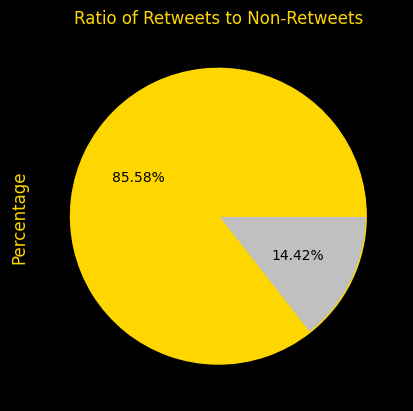

In [ ]:
plt.figure(facecolor='black')
ax = twt_data['is_retweet'].value_counts().plot(kind='pie', autopct='%.2f%%',labels=[True,False] ,colors=['gold', 'silver'], wedgeprops={'edgecolor': 'gold', 'linewidth': 1})
plt.gca().set_facecolor('black')
ax.tick_params(axis='x', colors='gold', labelsize='large')
ax.tick_params(axis='y', colors='gold', labelsize='large')
plt.ylabel('Percentage', color='gold', fontsize='large')
plt.title("Ratio of Retweets to Non-Retweets", color='gold', fontsize='large')
plt.show()


In [ ]:
twt_data.describe()

,likes,retweets,comments
count,15319.000000,15319.000000,15319.000000
mean,1088.794699,282.093022,187.659508
std,11808.386275,4897.901205,2679.197594
min,0.000000,0.000000,0.000000
25%,117.500000,18.000000,19.000000
50%,290.000000,46.000000,45.000000
75%,680.000000,115.000000,115.000000
max,776594.000000,359309.000000,225955.000000


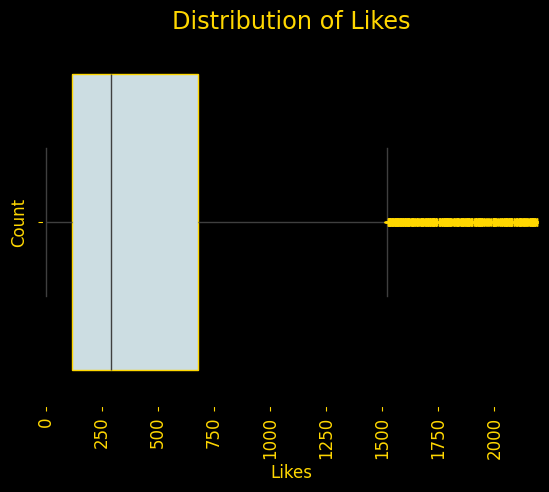

In [ ]:
plt.figure(facecolor='black')
ax = sns.boxplot(x=twt_data['likes'],
                 boxprops={'facecolor': '#CCDDE2', 'edgecolor': 'gold', 'zorder': 2},
                 flierprops={'marker': '+', 'markeredgecolor': 'gold'})

plt.gca().set_facecolor('black')

plt.xlabel('Likes', color='gold', fontsize='large')
plt.ylabel('Count', color='gold', fontsize='large')
ax.tick_params(axis='x', colors='gold', labelsize='large')
ax.tick_params(axis='y', colors='gold', labelsize='large')
plt.xticks(rotation=90)
plt.xlim([-10, 2200])

# Add a title and show the plot
plt.title("Distribution of Likes", color='gold', fontsize='xx-large')
plt.show()

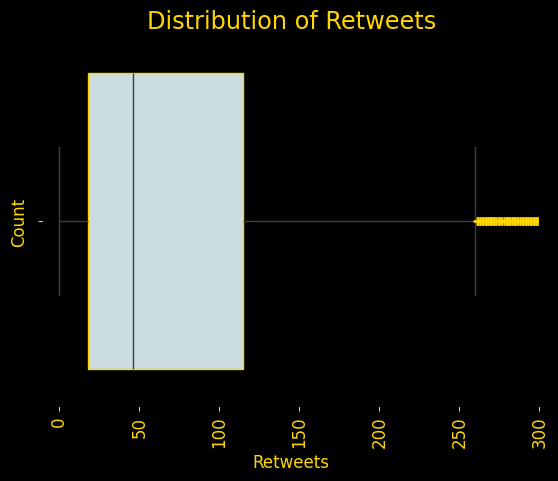

In [ ]:
plt.figure(facecolor='black')
ax = sns.boxplot(x=twt_data['retweets'],
                 boxprops={'facecolor': '#CCDDE2', 'edgecolor': 'gold', 'zorder': 2},
                 flierprops={'marker': '+', 'markeredgecolor': 'gold'})

plt.gca().set_facecolor('black')

plt.xlabel('Retweets', color='gold', fontsize='large')
plt.ylabel('Count', color='gold', fontsize='large')
ax.tick_params(axis='x', colors='gold', labelsize='large')
ax.tick_params(axis='y', colors='gold', labelsize='large')
plt.xticks(rotation=90)
plt.xlim([-10, 300])

# Add a title and show the plot
plt.title("Distribution of Retweets", color='gold', fontsize='xx-large')
plt.show()

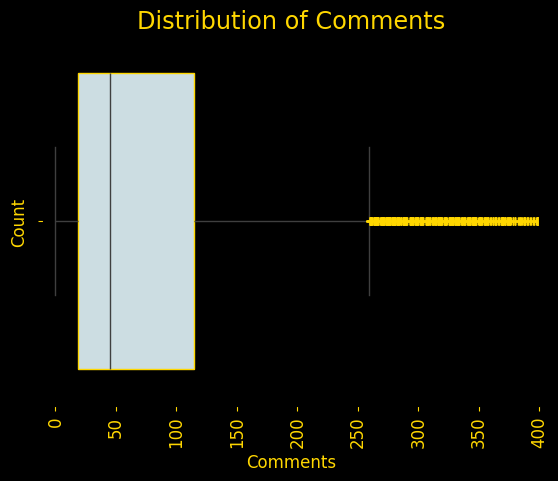

In [ ]:
plt.figure(facecolor='black')
ax = sns.boxplot(x=twt_data['comments'],
                 boxprops={'facecolor': '#CCDDE2', 'edgecolor': 'gold', 'zorder': 2},
                 flierprops={'marker': '+', 'markeredgecolor': 'gold'})

plt.gca().set_facecolor('black')

plt.xlabel('Comments', color='gold', fontsize='large')
plt.ylabel('Count', color='gold', fontsize='large')
ax.tick_params(axis='x', colors='gold', labelsize='large')
ax.tick_params(axis='y', colors='gold', labelsize='large')
plt.xticks(rotation=90)
plt.xlim([-10, 400])

# Add a title and show the plot
plt.title("Distribution of Comments", color='gold', fontsize='xx-large')
plt.show()

<ipython-input-107-930eb3931da5>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  twt_data["year"] = pd.to_datetime(twt_data["date"]).dt.year


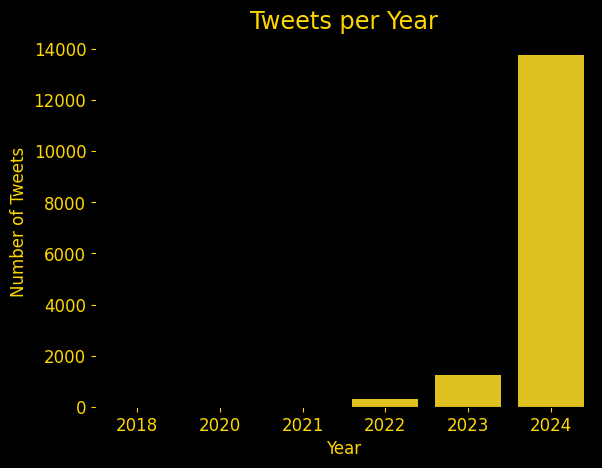

In [ ]:
twt_data["year"] = pd.to_datetime(twt_data["date"]).dt.year

# Count tweets per year
tweets_per_year = twt_data.groupby("year").size().reset_index(name="count")

# Create a bar chart
plt.figure(facecolor="black")
ax = sns.barplot(x="year", y="count", data=tweets_per_year, color="gold")

# Customize the plot
plt.gca().set_facecolor("black")
ax.tick_params(axis="x", colors="gold", labelsize="large")
ax.tick_params(axis="y", colors="gold", labelsize="large")
plt.xlabel("Year", color="gold", fontsize="large")
plt.ylabel("Number of Tweets", color="gold", fontsize="large")

# Add a title and show the plot
plt.title("Tweets per Year", color="gold", fontsize="xx-large")
plt.show()

In [ ]:
twt_data = twt_data[twt_data['year'] >= 2024]

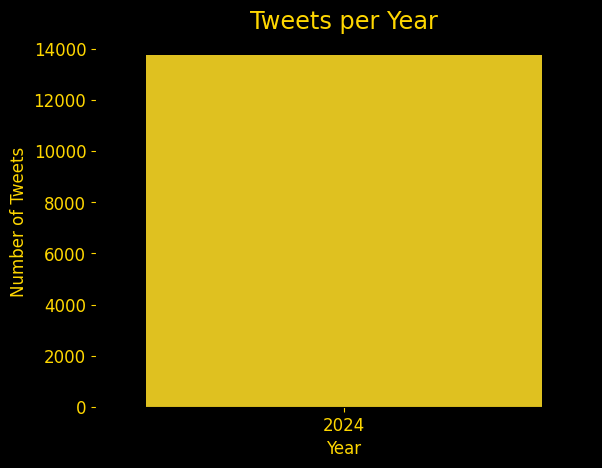

In [ ]:
# Count tweets per year
tweets_per_year = twt_data.groupby("year").size().reset_index(name="count")

# Create a bar chart
plt.figure(facecolor="black")
ax = sns.barplot(x="year", y="count", data=tweets_per_year, color="gold")

# Customize the plot
plt.gca().set_facecolor("black")
ax.tick_params(axis="x", colors="gold", labelsize="large")
ax.tick_params(axis="y", colors="gold", labelsize="large")
plt.xlabel("Year", color="gold", fontsize="large")
plt.ylabel("Number of Tweets", color="gold", fontsize="large")

# Add a title and show the plot
plt.title("Tweets per Year", color="gold", fontsize="xx-large")
plt.show()


In [ ]:
twt_data["date"] = pd.to_datetime(twt_data["date"])
twt_data.head()

,username,text,date,is_retweet,likes,retweets,comments,year
0,Trader_J,"Good to see Rover buying $NIPPY. I got a bag,...",2024-05-01 20:05:00,False,31,12,38,2024
2,Trader_J,$BTC Sub 59K as Expected. Now Run It Back or B...,2024-05-01 13:29:00,False,323,30,14,2024
3,Trader_J,"Sub 59K, Then 75K $BTC",2024-04-30 08:28:00,True,1026,122,84,2024
4,Trader_J,Exciting times ahead! May is gearing up to be ...,2024-04-29 13:25:00,False,7,2,13,2024
5,Trader_J,#Bitcoin Fear and Greed 65,2024-04-28 18:55:00,False,62,5,19,2024


In [ ]:
twt_data=twt_data[twt_data['date']<"2024-04-01 00:00:00"]

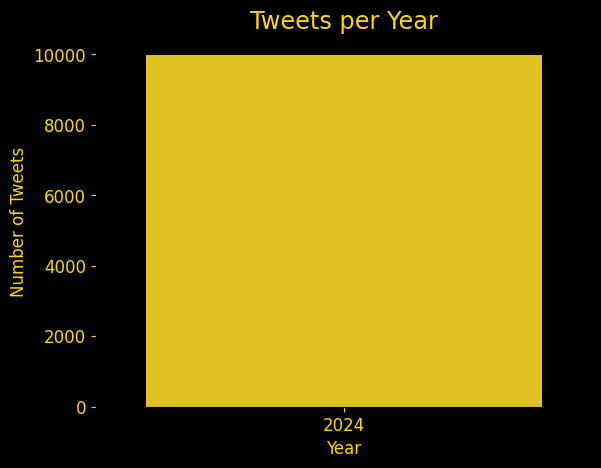

In [ ]:
# Count tweets per year
tweets_per_year = twt_data.groupby("year").size().reset_index(name="count")

# Create a bar chart
plt.figure(facecolor="black")
ax = sns.barplot(x="year", y="count", data=tweets_per_year, color="gold")

# Customize the plot
plt.gca().set_facecolor("black")
ax.tick_params(axis="x", colors="gold", labelsize="large")
ax.tick_params(axis="y", colors="gold", labelsize="large")
plt.xlabel("Year", color="gold", fontsize="large")
plt.ylabel("Number of Tweets", color="gold", fontsize="large")

# Add a title and show the plot
plt.title("Tweets per Year", color="gold", fontsize="xx-large")
plt.show()


In [ ]:
twt_data.describe()

,date,likes,retweets,comments,year
count,9991,9991.000000,9991.000000,9991.000000,9991.0
mean,2024-02-18 00:14:11.524371968,1089.086878,302.523271,176.640476,2024.0
min,2024-01-01 00:33:00,0.000000,0.000000,0.000000,2024.0
25%,2024-01-21 17:48:30,121.000000,21.000000,17.000000,2024.0
50%,2024-02-19 21:00:00,290.000000,50.000000,37.000000,2024.0
75%,2024-03-15 14:21:30,655.000000,118.000000,91.000000,2024.0
max,2024-03-31 23:50:00,776594.000000,359309.000000,225955.000000,2024.0
std,NaN,14081.215432,5890.611841,3250.628385,0.0


In [ ]:
twt_data.head()

,username,text,date,is_retweet,likes,retweets,comments,year
67,Trader_J,$BTC Fear and Greed 75 Last Week it was Extrem...,2024-03-31 13:54:00,False,85,8,23,2024
68,Trader_J,"Meta Plus is revolutionizing #RWA , #Defi with...",2024-03-30 17:51:00,False,84,24,37,2024
69,Trader_J,$VES surging continuously. Forming a livermore...,2024-03-30 13:00:00,False,30,6,19,2024
70,Trader_J,Full Send 🚀 $BTC,2024-03-28 11:13:00,True,252,22,29,2024
71,Trader_J,$DOGE Moon 🚀 Road to $1 ✍️,2024-03-28 11:36:00,True,213,24,30,2024


In [ ]:
# prompt: drop the rows if they have likes less than 15 or retweets less than 15

twt_data = twt_data[((twt_data['likes'] >= 1) & (twt_data['retweets'] >= 1))]


In [ ]:
twt_data.describe()

,date,likes,retweets,comments,year
count,9952,9952.000000,9952.000000,9952.000000,9952.0
mean,2024-02-18 00:28:26.346462720,1093.181069,303.708802,177.298633,2024.0
min,2024-01-01 00:33:00,1.000000,1.000000,0.000000,2024.0
25%,2024-01-21 20:12:15,122.000000,21.000000,17.000000,2024.0
50%,2024-02-19 21:04:30,292.000000,50.000000,37.000000,2024.0
75%,2024-03-15 14:24:30,657.250000,119.000000,91.250000,2024.0
max,2024-03-31 23:50:00,776594.000000,359309.000000,225955.000000,2024.0
std,NaN,14108.629549,5902.113302,3256.975007,0.0


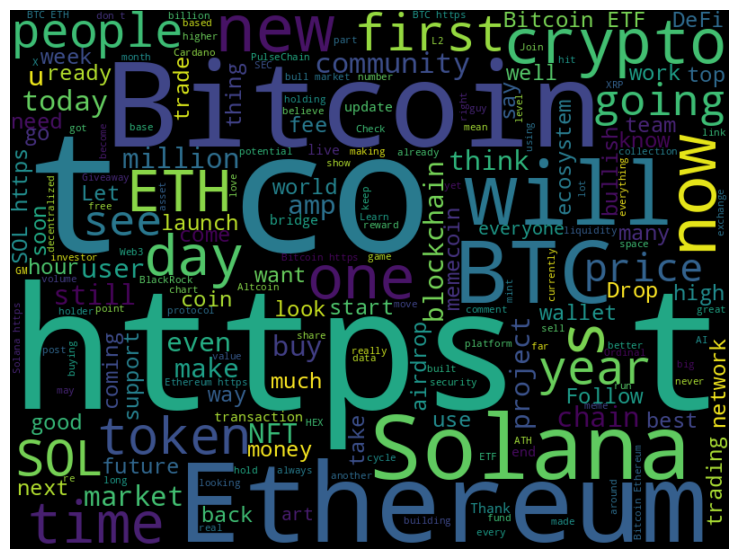

In [ ]:
text = " ".join(twt_data["text"].tolist())
wordcloud = WordCloud(width=800, height=600, background_color="black").generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

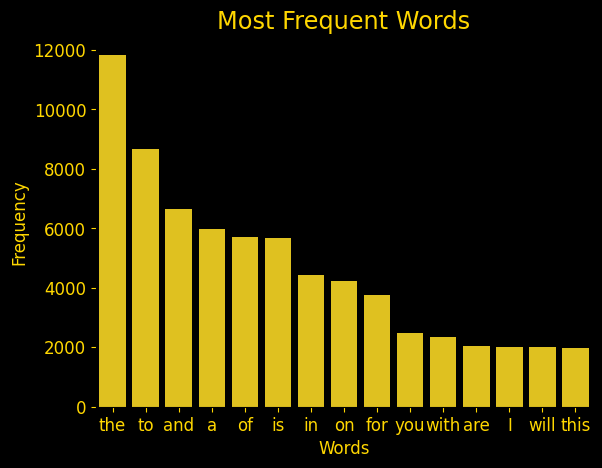

In [ ]:
# Create a bar chart of the most frequent words
word_counts = Counter(text.split())
most_frequent_words = word_counts.most_common(15)
words, counts = zip(*most_frequent_words)

plt.figure(facecolor="black")
ax = sns.barplot(x=words, y=counts, color="gold")

# Customize the plot
plt.gca().set_facecolor("black")
ax.tick_params(axis="x", colors="gold", labelsize="large")
ax.tick_params(axis="y", colors="gold", labelsize="large")
plt.xlabel("Words", color="gold", fontsize="large")
plt.ylabel("Frequency", color="gold", fontsize="large")

# Add a title and show the plot
plt.title("Most Frequent Words", color="gold", fontsize="xx-large")
plt.show()

#NLP techniques

##Removing irrelevant tweets

In [ ]:
#!pip install scikit-learn

In [ ]:
twt_df=twt_data
twt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9952 entries, 67 to 15434
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   username    9952 non-null   object        
 1   text        9952 non-null   object        
 2   date        9952 non-null   datetime64[ns]
 3   is_retweet  9952 non-null   bool          
 4   likes       9952 non-null   int64         
 5   retweets    9952 non-null   int64         
 6   comments    9952 non-null   int64         
 7   year        9952 non-null   int32         
dtypes: bool(1), datetime64[ns](1), int32(1), int64(3), object(2)
memory usage: 592.8+ KB


In [ ]:
nltk.download('punkt')
twt_df['text']=twt_df['text'].str.lower()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
twt_df.head()

,username,text,date,is_retweet,likes,retweets,comments,year
67,Trader_J,$btc fear and greed 75 last week it was extrem...,2024-03-31 13:54:00,False,85,8,23,2024
68,Trader_J,"meta plus is revolutionizing #rwa , #defi with...",2024-03-30 17:51:00,False,84,24,37,2024
69,Trader_J,$ves surging continuously. forming a livermore...,2024-03-30 13:00:00,False,30,6,19,2024
70,Trader_J,full send 🚀 $btc,2024-03-28 11:13:00,True,252,22,29,2024
71,Trader_J,$doge moon 🚀 road to $1 ✍️,2024-03-28 11:36:00,True,213,24,30,2024


In [ ]:
def get_crypto_name(text):
    btc=['bitcoin','btc','market','crypto','cryptocurrency']
    eth=['ethereum','eth']
    sol=['solona','solana','sol']
    drop_words=['giveaway','claim your','free']
    if (any(word in text for word in btc) and all(d_w not in text for d_w in drop_words)):
        return 'BTC'
    elif (any(word in text for word in eth) and all(d_w not in text for d_w in drop_words)):
        return 'ETH'
    elif (any(word in text for word in sol) and all(d_w not in text for d_w in drop_words)):
        return 'SOL'
# Apply the function to create a new column in sentiments_data
twt_df['crypto'] = twt_df['text'].apply(get_crypto_name)

In [ ]:
twt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9952 entries, 67 to 15434
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   username    9952 non-null   object        
 1   text        9952 non-null   object        
 2   date        9952 non-null   datetime64[ns]
 3   is_retweet  9952 non-null   bool          
 4   likes       9952 non-null   int64         
 5   retweets    9952 non-null   int64         
 6   comments    9952 non-null   int64         
 7   year        9952 non-null   int32         
 8   crypto      8363 non-null   object        
dtypes: bool(1), datetime64[ns](1), int32(1), int64(3), object(3)
memory usage: 670.6+ KB


In [ ]:
twt_df.dropna(inplace=True)

In [ ]:
twt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8363 entries, 67 to 15434
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   username    8363 non-null   object        
 1   text        8363 non-null   object        
 2   date        8363 non-null   datetime64[ns]
 3   is_retweet  8363 non-null   bool          
 4   likes       8363 non-null   int64         
 5   retweets    8363 non-null   int64         
 6   comments    8363 non-null   int64         
 7   year        8363 non-null   int32         
 8   crypto      8363 non-null   object        
dtypes: bool(1), datetime64[ns](1), int32(1), int64(3), object(3)
memory usage: 563.5+ KB


In [ ]:
twt_df.head()

,username,text,date,is_retweet,likes,retweets,comments,year,crypto
67,Trader_J,$btc fear and greed 75 last week it was extrem...,2024-03-31 13:54:00,False,85,8,23,2024,BTC
70,Trader_J,full send 🚀 $btc,2024-03-28 11:13:00,True,252,22,29,2024,BTC
72,Trader_J,you should focus on $matic. its still cheap. #...,2024-03-29 16:15:00,True,106,17,15,2024,BTC
74,Trader_J,tired of centralized platforms dictating the r...,2024-03-29 17:12:00,False,42,16,23,2024,SOL
75,Trader_J,definitely $tmeme is a hidden gem in sol meme ...,2024-03-29 16:00:00,False,21,4,17,2024,SOL


In [ ]:
twt_df.to_csv('relevant_data.csv')

#Revisualizing finale data

In [ ]:
data=pd.read_csv('/content/relevant_data.csv')

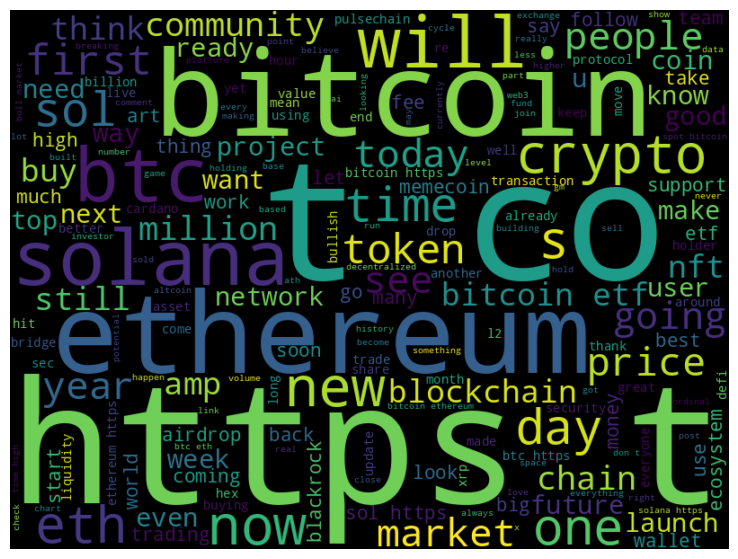

In [ ]:
text = " ".join(data["text"].tolist())
wordcloud = WordCloud(width=800, height=600, background_color="black").generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Model Testing

##Finbert

In [ ]:
Z = data['text'].to_list()
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model_finbert = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [ ]:
preds2 = []
tokenizer_kwargs = {"padding": True, "truncation": True}
for x in Z:
    with torch.no_grad():
        input_sequence = tokenizer(x, return_tensors="pt", **tokenizer_kwargs)
        logits = model_finbert(**input_sequence).logits
        scores = {
        k: v
        for k, v in zip(
            model_finbert.config.id2label.values(),
            scipy.special.softmax(logits.numpy().squeeze()),
        )
    }
    preds2.append(scores)

In [ ]:
preds2[10:20]

[{'positive': 0.02562523, 'negative': 0.033214316, 'neutral': 0.94116044},
 {'positive': 0.02562523, 'negative': 0.033214316, 'neutral': 0.94116044},
 {'positive': 0.10597133, 'negative': 0.05691242, 'neutral': 0.83711624},
 {'positive': 0.03483501, 'negative': 0.019955145, 'neutral': 0.94520986},
 {'positive': 0.8042336, 'negative': 0.017057976, 'neutral': 0.1787084},
 {'positive': 0.07504627, 'negative': 0.011479711, 'neutral': 0.913474},
 {'positive': 0.19847593, 'negative': 0.011281508, 'neutral': 0.79024255},
 {'positive': 0.049981248, 'negative': 0.42195642, 'neutral': 0.52806234},
 {'positive': 0.2642437, 'negative': 0.06415765, 'neutral': 0.6715987},
 {'positive': 0.3678182, 'negative': 0.021135518, 'neutral': 0.61104625}]

In [ ]:
preds2_lab=[]
l=len(preds2)
for i in range(0,l):
  preds2_lab.append(max(preds2[i],key=preds2[i].get))

In [ ]:
preds2_lab[0:5]

['neutral', 'neutral', 'neutral', 'neutral', 'positive']

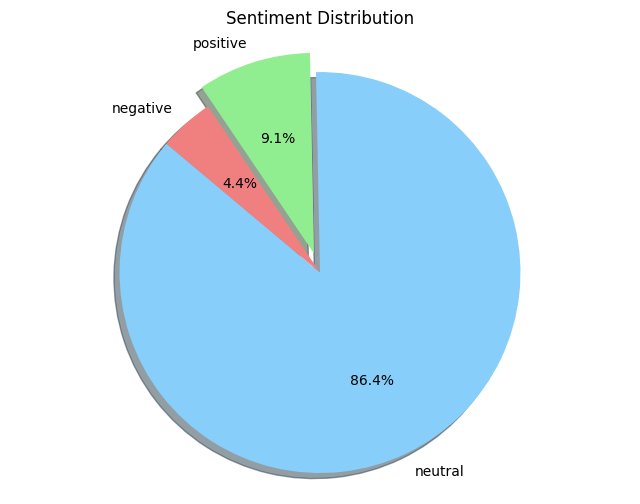

In [ ]:
sentiment_counts = {'neutral': 0, 'positive': 0, 'negative': 0}
for sentiment in preds2_lab:
    sentiment_counts[sentiment] += 1

# Plotting the pie chart
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['lightskyblue', 'lightgreen', 'lightcoral']
explode = (0, 0.1, 0)  # explode the 2nd slice (Positive)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Sentiment Distribution')
plt.show()

In [ ]:
import torch
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model_finbert = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
def finbert_test(text):
  tokenizer_kwargs = {"padding": True, "truncation": True}
  with torch.no_grad():
        input_sequence = tokenizer(text, return_tensors="pt", **tokenizer_kwargs)
        logits = model_finbert(**input_sequence).logits
        scores = {
        k: v
        for k, v in zip(
            model_finbert.config.id2label.values(),
            scipy.special.softmax(logits.numpy().squeeze()),
        )
    }
  print(scores)

In [ ]:
finbert_test('#Bitcoin Fear and Greed 65')

{'positive': 0.03100307, 'negative': 0.053973053, 'neutral': 0.9150239}


In [ ]:
finbert_test("Bitcoin on fire!")

{'positive': 0.036225587, 'negative': 0.27796072, 'neutral': 0.68581367}


In [ ]:
finbert_test("Bitcoin to 74k")

{'positive': 0.7762556, 'negative': 0.048319392, 'neutral': 0.1754249}


In [ ]:
finbert_test("Sub 59K, Then 75K $BTC")

{'positive': 0.035969824, 'negative': 0.033997603, 'neutral': 0.93003255}


##Roberta twitter

In [ ]:
def roberta_test(text):
# Load the model and tokenizer
  model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
  tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

  # Prepare the input text

  encoded_input = tokenizer(text, return_tensors='pt')

  # Get the model's output
  output = model(**encoded_input)

  # Get the model's prediction
  scores = output[0][0].detach().numpy()
  scores = scipy.special.softmax(scores)
  for i, score in enumerate(scores):
        class_label = model.config.id2label[i]
        print(f"Class: {class_label}, Score: {score:.4f}")

In [ ]:
roberta_test("#Bitcoin Fear and Greed 65")

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Class: negative, Score: 0.7247
Class: neutral, Score: 0.2586
Class: positive, Score: 0.0167


In [ ]:
roberta_test("Bitcoin on fire!")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Class: negative, Score: 0.0072
Class: neutral, Score: 0.0956
Class: positive, Score: 0.8973


In [ ]:
roberta_test("Bitcoin to 74k")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Class: negative, Score: 0.0171
Class: neutral, Score: 0.7016
Class: positive, Score: 0.2813


In [ ]:
roberta_test("Sub 59K, Then 75K $BTC")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Class: negative, Score: 0.0114
Class: neutral, Score: 0.8754
Class: positive, Score: 0.1132


##Roberta Results

In [ ]:
data.head()

,Unnamed: 0,username,text,date,is_retweet,likes,retweets,comments,year,crypto
0,67,Trader_J,$btc fear and greed 75 last week it was extrem...,2024-03-31 13:54:00,False,85,8,23,2024,BTC
1,70,Trader_J,full send 🚀 $btc,2024-03-28 11:13:00,True,252,22,29,2024,BTC
2,72,Trader_J,you should focus on $matic. its still cheap. #...,2024-03-29 16:15:00,True,106,17,15,2024,BTC
3,74,Trader_J,tired of centralized platforms dictating the r...,2024-03-29 17:12:00,False,42,16,23,2024,SOL
4,75,Trader_J,definitely $tmeme is a hidden gem in sol meme ...,2024-03-29 16:00:00,False,21,4,17,2024,SOL


In [ ]:
X = data['text'].to_list()
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
model_roberta = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
preds_roberta = []
positive_p=[]
negative_p=[]
neutral_p=[]
tokenizer_kwargs = {"padding": True, "truncation": True,"max_length": 512}
for x in X:
    with torch.no_grad():
        input_sequence = tokenizer(x, return_tensors="pt", **tokenizer_kwargs)
        logits = model_roberta(**input_sequence).logits
        scores = scipy.special.softmax(logits.numpy().squeeze())
        labels = ['negative', 'neutral', 'positive']
        scores_dict = {label: score for label, score in zip(labels, scores)}
        negative_p.append(scores_dict['negative'])
        neutral_p.append(scores_dict['neutral'])
        positive_p.append(scores_dict['positive'])
        sentimentRoberta = max(scores_dict, key=scores_dict.get)
        preds_roberta.append(sentimentRoberta)

In [ ]:
preds_roberta[0:10]

['negative',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive']

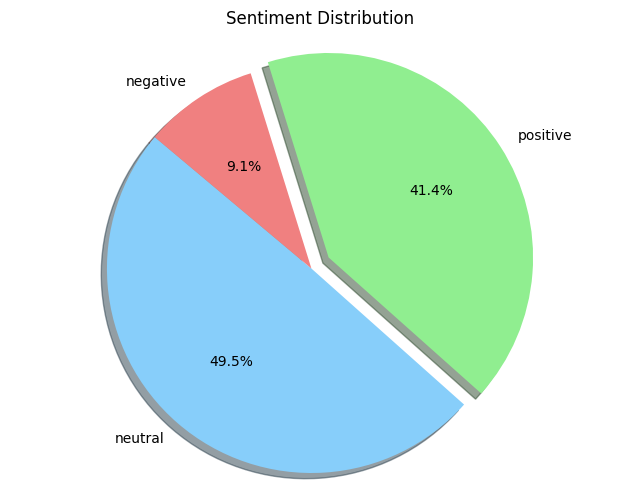

In [ ]:
sentiment_counts = {'neutral': 0, 'positive': 0, 'negative': 0}
for sentiment in preds_roberta:
    sentiment_counts[sentiment] += 1

# Plotting the pie chart
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['lightskyblue', 'lightgreen', 'lightcoral']
explode = (0, 0.1, 0)  # explode the 2nd slice (Positive)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Sentiment Distribution')
plt.show()

In [ ]:
data['predicted_roberta'] = preds_roberta
data['positive_p']=positive_p
data['negative_p']=negative_p
data['neutral_p']=neutral_p

In [ ]:
data.head()

,Unnamed: 0,username,text,date,is_retweet,likes,retweets,comments,year,crypto,predicted_roberta,positive_p,negative_p,neutral_p
0,67,Trader_J,$btc fear and greed 75 last week it was extrem...,2024-03-31 13:54:00,False,85,8,23,2024,BTC,negative,0.021080,0.748027,0.230893
1,70,Trader_J,full send 🚀 $btc,2024-03-28 11:13:00,True,252,22,29,2024,BTC,neutral,0.150940,0.021924,0.827136
2,72,Trader_J,you should focus on $matic. its still cheap. #...,2024-03-29 16:15:00,True,106,17,15,2024,BTC,positive,0.900056,0.002564,0.097379
3,74,Trader_J,tired of centralized platforms dictating the r...,2024-03-29 17:12:00,False,42,16,23,2024,SOL,positive,0.915509,0.002792,0.081699
4,75,Trader_J,definitely $tmeme is a hidden gem in sol meme ...,2024-03-29 16:00:00,False,21,4,17,2024,SOL,positive,0.947039,0.002056,0.050905


In [ ]:
data.to_csv('final_sentiment.csv')

In [ ]:
def wordcount_gen(df, category):

    combined_tweets = " ".join([tweet for tweet in df[df.predicted_roberta == category]['text']])

    wordcloud = WordCloud(width=800, height=600, background_color="black").generate(combined_tweets)

    # Plot the word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

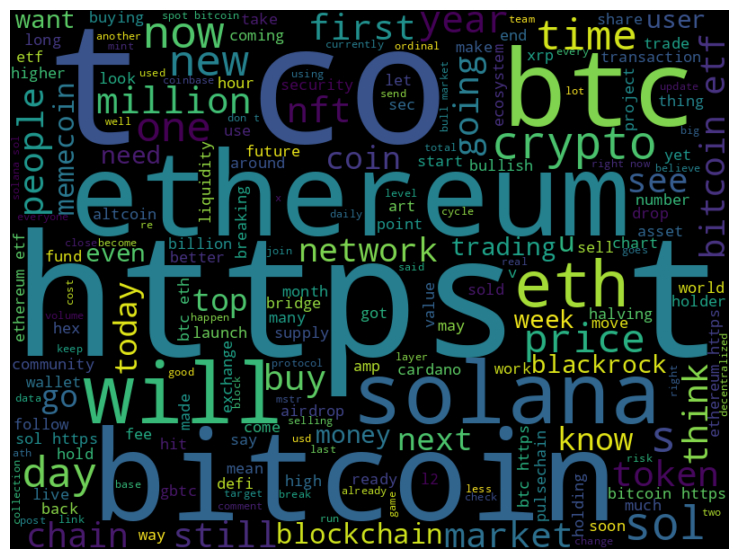

In [ ]:
wordcount_gen(data,'neutral')

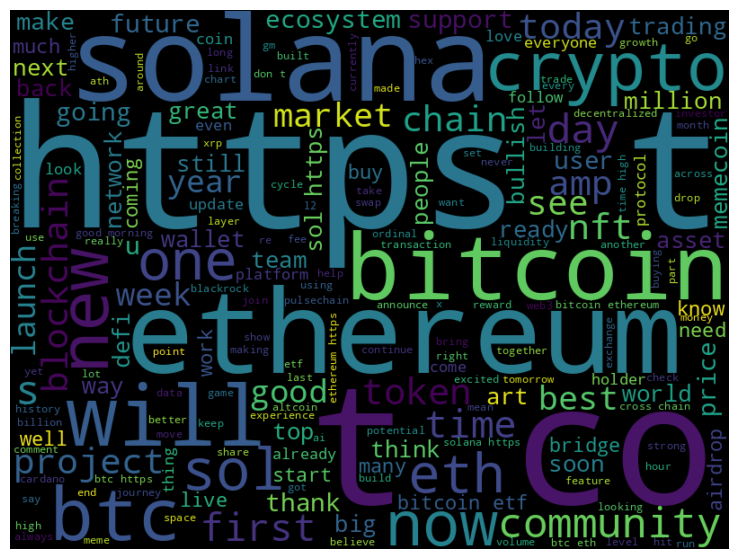

In [ ]:
wordcount_gen(data,'positive')

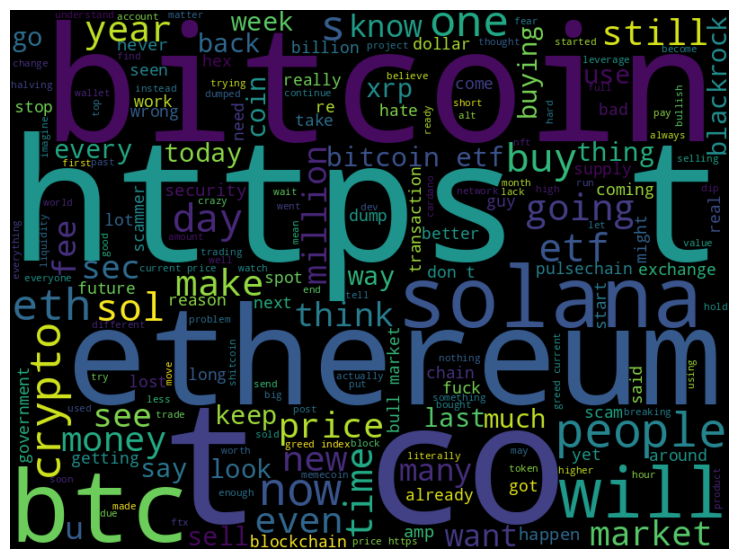

In [ ]:
wordcount_gen(data,'negative')

In [ ]:
data.describe()

,Unnamed: 0,likes,retweets,comments,year,positive_p,negative_p,neutral_p
count,8363.000000,8363.000000,8363.000000,8363.000000,8363.0,8363.000000,8363.000000,8363.000000
mean,10299.363386,982.790386,272.151620,171.615210,2024.0,0.425023,0.119268,0.455710
std,3610.545556,12291.689859,5800.548695,3527.777301,0.0,0.331094,0.202624,0.270757
min,67.000000,1.000000,1.000000,0.000000,2024.0,0.002754,0.000593,0.005022
25%,8458.000000,131.000000,25.000000,17.000000,2024.0,0.103030,0.004661,0.215899
50%,10800.000000,304.000000,54.000000,37.000000,2024.0,0.357494,0.021748,0.467832
75%,13006.500000,685.000000,122.000000,90.000000,2024.0,0.743508,0.120751,0.690335
max,15434.000000,776594.000000,359309.000000,225955.000000,2024.0,0.993570,0.969549,0.940895


#First Approach

##Reading data

In [ ]:
binance_data=pd.read_csv('/content/drive/MyDrive/binance_data.csv')
binance_data.head()

,Name,Open_time_unix,Open_time,open,high,low,close,volume,close_time_unix,Close_time,quote_volume,trans_count,taker_buy_volume,taker_buy_quote_volume,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,BTC,1.704060e+09,NaN,42283.58,42775.00,42261.02,42613.56,2468.05964,1.704067e+09,NaN,1.049421e+08,97530.0,1394.89808,59313062.17,NaN,NaN,NaN
1,BTC,1.704067e+09,NaN,42613.57,42638.41,42230.08,42330.49,1480.02371,1.704074e+09,NaN,6.287643e+07,68483.0,645.36073,27414013.68,NaN,NaN,NaN
2,BTC,1.704074e+09,NaN,42330.50,42406.00,42180.77,42234.01,1451.94912,1.704082e+09,NaN,6.143115e+07,68238.0,711.81324,30118213.80,NaN,NaN,NaN
3,BTC,1.704082e+09,NaN,42234.01,42500.00,42208.68,42492.46,1255.04968,1.704089e+09,NaN,5.321205e+07,60314.0,673.97948,28569243.81,NaN,NaN,NaN
4,BTC,1.704089e+09,NaN,42492.46,42699.32,42452.58,42649.69,1306.81856,1.704096e+09,NaN,5.565394e+07,64731.0,663.49871,28258215.24,NaN,NaN,NaN


In [ ]:
sentiments_data=pd.read_csv('/content/drive/MyDrive/final_sentiment.csv')
sentiments_data.head()

,Unnamed: 0.1,Unnamed: 0,username,text,date,is_retweet,likes,retweets,comments,year,crypto,predicted_roberta,positive_p,negative_p,neutral_p
0,0,67,Trader_J,$btc fear and greed 75 last week it was extrem...,2024-03-31 13:54:00,False,85,8,23,2024,BTC,negative,0.021080,0.748027,0.230893
1,1,70,Trader_J,full send 🚀 $btc,2024-03-28 11:13:00,True,252,22,29,2024,BTC,neutral,0.150940,0.021924,0.827136
2,2,72,Trader_J,you should focus on $matic. its still cheap. #...,2024-03-29 16:15:00,True,106,17,15,2024,BTC,positive,0.900056,0.002564,0.097379
3,3,74,Trader_J,tired of centralized platforms dictating the r...,2024-03-29 17:12:00,False,42,16,23,2024,SOL,positive,0.915509,0.002792,0.081699
4,4,75,Trader_J,definitely $tmeme is a hidden gem in sol meme ...,2024-03-29 16:00:00,False,21,4,17,2024,SOL,positive,0.947039,0.002056,0.050905


##Data Preparing

In [ ]:
# Convert the Unix time column to datetime format
binance_data['Open_time_unix'] = pd.to_datetime(binance_data['Open_time_unix'], unit='s')
binance_data['close_time_unix'] = pd.to_datetime(binance_data['close_time_unix'], unit='s')
binance_data['Close_time'] = binance_data['close_time_unix'].dt.strftime('%Y-%m-%d %H:%M:%S')
binance_data['Open_time'] = binance_data['Open_time_unix'].dt.strftime('%Y-%m-%d %H:%M:%S')
binance_data.head()

,Name,Open_time_unix,Open_time,open,high,low,close,volume,close_time_unix,Close_time,quote_volume,trans_count,taker_buy_volume,taker_buy_quote_volume,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,BTC,2023-12-31 22:00:00,2023-12-31 22:00:00,42283.58,42775.00,42261.02,42613.56,2468.05964,2024-01-01 00:00:00,2024-01-01 00:00:00,1.049421e+08,97530.0,1394.89808,59313062.17,NaN,NaN,NaN
1,BTC,2024-01-01 00:00:00,2024-01-01 00:00:00,42613.57,42638.41,42230.08,42330.49,1480.02371,2024-01-01 02:00:00,2024-01-01 02:00:00,6.287643e+07,68483.0,645.36073,27414013.68,NaN,NaN,NaN
2,BTC,2024-01-01 02:00:00,2024-01-01 02:00:00,42330.50,42406.00,42180.77,42234.01,1451.94912,2024-01-01 04:00:00,2024-01-01 04:00:00,6.143115e+07,68238.0,711.81324,30118213.80,NaN,NaN,NaN
3,BTC,2024-01-01 04:00:00,2024-01-01 04:00:00,42234.01,42500.00,42208.68,42492.46,1255.04968,2024-01-01 06:00:00,2024-01-01 06:00:00,5.321205e+07,60314.0,673.97948,28569243.81,NaN,NaN,NaN
4,BTC,2024-01-01 06:00:00,2024-01-01 06:00:00,42492.46,42699.32,42452.58,42649.69,1306.81856,2024-01-01 08:00:00,2024-01-01 08:00:00,5.565394e+07,64731.0,663.49871,28258215.24,NaN,NaN,NaN


In [ ]:
binance_data['Close_time'] =pd.to_datetime(binance_data['Close_time'])
binance_data['Open_time'] =pd.to_datetime(binance_data['Open_time'])
binance_data.dtypes

Name                              object
Open_time_unix            datetime64[ns]
Open_time                 datetime64[ns]
open                             float64
high                             float64
low                              float64
close                            float64
volume                           float64
close_time_unix           datetime64[ns]
Close_time                datetime64[ns]
quote_volume                     float64
trans_count                      float64
taker_buy_volume                 float64
taker_buy_quote_volume           float64
Unnamed: 14                      float64
Unnamed: 15                      float64
Unnamed: 16                      float64
dtype: object

In [ ]:
sentiments_data['text']=sentiments_data['text'].str.lower()
sentiments_data['date'] = pd.to_datetime(sentiments_data['date'])
sentiments_data.dtypes

Unnamed: 0.1                  int64
Unnamed: 0                    int64
username                     object
text                         object
date                 datetime64[ns]
is_retweet                     bool
likes                         int64
retweets                      int64
comments                      int64
year                          int64
crypto                       object
predicted_roberta            object
positive_p                  float64
negative_p                  float64
neutral_p                   float64
dtype: object

##Data Joining

In [ ]:
mean_sentiments=[]
# Merge the data based on the conditions

for index, row in binance_data.iterrows():
    mask = ((sentiments_data['date'] >= row['Open_time']) & (sentiments_data['date'] <= row['Close_time']) & (sentiments_data['crypto'] == row['Name']))
    filtered_sentiments = sentiments_data.loc[mask, ['positive_p', 'negative_p', 'neutral_p']]
    if not filtered_sentiments.empty:
        mean_values = filtered_sentiments.mean().to_dict()
        mean_values['index'] = index  # Store the index to merge correctly
        mean_sentiments.append(mean_values)

mean_sentiments_df = pd.DataFrame(mean_sentiments)
mean_sentiments_df.set_index('index', inplace=True)

# Merge this DataFrame with binance_data
# Using join to ensure the indices align correctly
binance_data = binance_data.join(mean_sentiments_df, how='left')

binance_data[15:20]

,Name,Open_time_unix,Open_time,open,high,low,close,volume,close_time_unix,Close_time,quote_volume,trans_count,taker_buy_volume,taker_buy_quote_volume,Unnamed: 14,Unnamed: 15,Unnamed: 16,positive_p,negative_p,neutral_p
15,BTC,2024-01-02 04:00:00,2024-01-02 04:00:00,45179.48,45643.75,45130.00,45455.53,4502.86310,2024-01-02 06:00:00,2024-01-02 06:00:00,204271585.3,143807.0,2234.53789,1.013696e+08,NaN,NaN,NaN,NaN,NaN,NaN
16,BTC,2024-01-02 06:00:00,2024-01-02 06:00:00,45455.52,45879.63,45326.60,45673.48,5419.67902,2024-01-02 08:00:00,2024-01-02 08:00:00,247708098.4,183818.0,2773.08077,1.267426e+08,NaN,NaN,NaN,0.630035,0.089645,0.280321
17,BTC,2024-01-02 08:00:00,2024-01-02 08:00:00,45673.48,45711.10,45200.00,45433.99,4607.71556,2024-01-02 10:00:00,2024-01-02 10:00:00,209606177.0,162018.0,2124.97496,9.666036e+07,NaN,NaN,NaN,0.936727,0.003812,0.059461
18,BTC,2024-01-02 10:00:00,2024-01-02 10:00:00,45433.99,45705.80,45264.39,45637.93,4381.88015,2024-01-02 12:00:00,2024-01-02 12:00:00,199291902.0,157305.0,2308.44695,1.049811e+08,NaN,NaN,NaN,NaN,NaN,NaN
19,BTC,2024-01-02 12:00:00,2024-01-02 12:00:00,45637.92,45800.00,44833.33,45184.82,8854.24900,2024-01-02 14:00:00,2024-01-02 14:00:00,400845316.9,277307.0,4326.53178,1.958822e+08,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
binance_data = binance_data.drop(columns=['Unnamed: 14','Unnamed: 15','Unnamed: 16'])

In [ ]:
binance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Name                    3276 non-null   object        
 1   Open_time_unix          3276 non-null   datetime64[ns]
 2   Open_time               3276 non-null   datetime64[ns]
 3   open                    3276 non-null   float64       
 4   high                    3276 non-null   float64       
 5   low                     3276 non-null   float64       
 6   close                   3276 non-null   float64       
 7   volume                  3276 non-null   float64       
 8   close_time_unix         3276 non-null   datetime64[ns]
 9   Close_time              3276 non-null   datetime64[ns]
 10  quote_volume            3276 non-null   float64       
 11  trans_count             3276 non-null   float64       
 12  taker_buy_volume        3276 non-null   float64 

In [ ]:
m1=(sentiments_data['date']>='2024-01-22 13:26:40') & (sentiments_data['date'] <='2024-01-22 16:13:20')
m2=sentiments_data[m1]
np.mean(m2['positive_p'])

0.38402666999999996

In [ ]:
len(sentiments_data[sentiments_data['crypto']=='SOL'])

1765

In [ ]:
len(sentiments_data[sentiments_data['crypto']=='BTC'])

4715

In [ ]:
len(sentiments_data[sentiments_data['crypto']=='ETH'])

1883

##Preprocessing

In [ ]:
#steps:
#DONE #1-filling missing values with closest sentiments
#DONE #2-preparing the data and removing columns not needed and add the output column , see iza fina after to make grouping by 2h-4h-6h
#DONE #Visualization of 1 currency using candlesticks
#hl2 models:
#(2 models): LSTM & RF
#each model should be run seprartly and evaluated seprartly
#APPROACH 2 OF INFLUENCE LIKES WHEK BASS IG LZM N3MLO BI R, + R LAL CURRENT DATA
#Mnkoun 5lssna hek maba3rf iza mn2ss shi birassi

In [ ]:
BTC_data=binance_data[binance_data['Name']=='BTC']
BTC_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 0 to 1091
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Name                    1092 non-null   object        
 1   Open_time_unix          1092 non-null   datetime64[ns]
 2   Open_time               1092 non-null   datetime64[ns]
 3   open                    1092 non-null   float64       
 4   high                    1092 non-null   float64       
 5   low                     1092 non-null   float64       
 6   close                   1092 non-null   float64       
 7   volume                  1092 non-null   float64       
 8   close_time_unix         1092 non-null   datetime64[ns]
 9   Close_time              1092 non-null   datetime64[ns]
 10  quote_volume            1092 non-null   float64       
 11  trans_count             1092 non-null   float64       
 12  taker_buy_volume        1092 non-null   float64      

In [ ]:
ETH_data = binance_data[binance_data['Name'] == 'ETH']
ETH_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 1092 to 2183
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Name                    1092 non-null   object        
 1   Open_time_unix          1092 non-null   datetime64[ns]
 2   Open_time               1092 non-null   datetime64[ns]
 3   open                    1092 non-null   float64       
 4   high                    1092 non-null   float64       
 5   low                     1092 non-null   float64       
 6   close                   1092 non-null   float64       
 7   volume                  1092 non-null   float64       
 8   close_time_unix         1092 non-null   datetime64[ns]
 9   Close_time              1092 non-null   datetime64[ns]
 10  quote_volume            1092 non-null   float64       
 11  trans_count             1092 non-null   float64       
 12  taker_buy_volume        1092 non-null   float64   

In [ ]:
SOL_data = binance_data[binance_data['Name'] == 'SOL']
SOL_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 2184 to 3275
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Name                    1092 non-null   object        
 1   Open_time_unix          1092 non-null   datetime64[ns]
 2   Open_time               1092 non-null   datetime64[ns]
 3   open                    1092 non-null   float64       
 4   high                    1092 non-null   float64       
 5   low                     1092 non-null   float64       
 6   close                   1092 non-null   float64       
 7   volume                  1092 non-null   float64       
 8   close_time_unix         1092 non-null   datetime64[ns]
 9   Close_time              1092 non-null   datetime64[ns]
 10  quote_volume            1092 non-null   float64       
 11  trans_count             1092 non-null   float64       
 12  taker_buy_volume        1092 non-null   float64   

In [ ]:
BTC_data = BTC_data.drop(columns = ['Name'])
BTC_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 0 to 1091
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Open_time_unix          1092 non-null   datetime64[ns]
 1   Open_time               1092 non-null   datetime64[ns]
 2   open                    1092 non-null   float64       
 3   high                    1092 non-null   float64       
 4   low                     1092 non-null   float64       
 5   close                   1092 non-null   float64       
 6   volume                  1092 non-null   float64       
 7   close_time_unix         1092 non-null   datetime64[ns]
 8   Close_time              1092 non-null   datetime64[ns]
 9   quote_volume            1092 non-null   float64       
 10  trans_count             1092 non-null   float64       
 11  taker_buy_volume        1092 non-null   float64       
 12  taker_buy_quote_volume  1092 non-null   float64      

In [ ]:
ETH_data = ETH_data.drop(columns = ['Name'])
ETH_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 1092 to 2183
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Open_time_unix          1092 non-null   datetime64[ns]
 1   Open_time               1092 non-null   datetime64[ns]
 2   open                    1092 non-null   float64       
 3   high                    1092 non-null   float64       
 4   low                     1092 non-null   float64       
 5   close                   1092 non-null   float64       
 6   volume                  1092 non-null   float64       
 7   close_time_unix         1092 non-null   datetime64[ns]
 8   Close_time              1092 non-null   datetime64[ns]
 9   quote_volume            1092 non-null   float64       
 10  trans_count             1092 non-null   float64       
 11  taker_buy_volume        1092 non-null   float64       
 12  taker_buy_quote_volume  1092 non-null   float64   

In [ ]:
SOL_data = SOL_data.drop(columns = ['Name'])
SOL_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 2184 to 3275
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Open_time_unix          1092 non-null   datetime64[ns]
 1   Open_time               1092 non-null   datetime64[ns]
 2   open                    1092 non-null   float64       
 3   high                    1092 non-null   float64       
 4   low                     1092 non-null   float64       
 5   close                   1092 non-null   float64       
 6   volume                  1092 non-null   float64       
 7   close_time_unix         1092 non-null   datetime64[ns]
 8   Close_time              1092 non-null   datetime64[ns]
 9   quote_volume            1092 non-null   float64       
 10  trans_count             1092 non-null   float64       
 11  taker_buy_volume        1092 non-null   float64       
 12  taker_buy_quote_volume  1092 non-null   float64   

In [ ]:
SOL_data.head()

,Open_time_unix,Open_time,open,high,low,close,volume,close_time_unix,Close_time,quote_volume,trans_count,taker_buy_volume,taker_buy_quote_volume,positive_p,negative_p,neutral_p
2184,2023-12-31 22:00:00,2023-12-31 22:00:00,101.72,104.75,101.51,104.12,438776.26,2024-01-01 00:00:00,2024-01-01 00:00:00,45116328.05,58520.0,242373.50,2.492147e+07,NaN,NaN,NaN
2185,2024-01-01 00:00:00,2024-01-01 00:00:00,104.11,104.34,102.54,103.07,252692.47,2024-01-01 02:00:00,2024-01-01 02:00:00,26132214.91,36074.0,119794.22,1.239130e+07,0.049405,0.057983,0.892612
2186,2024-01-01 02:00:00,2024-01-01 02:00:00,103.07,103.98,101.44,101.64,240582.04,2024-01-01 04:00:00,2024-01-01 04:00:00,24631580.29,37121.0,113602.01,1.162797e+07,NaN,NaN,NaN
2187,2024-01-01 04:00:00,2024-01-01 04:00:00,101.64,103.25,101.54,102.51,185064.07,2024-01-01 06:00:00,2024-01-01 06:00:00,18932919.76,25165.0,88445.17,9.046501e+06,NaN,NaN,NaN
2188,2024-01-01 06:00:00,2024-01-01 06:00:00,102.49,104.31,101.78,104.03,272109.66,2024-01-01 08:00:00,2024-01-01 08:00:00,28050587.70,35483.0,135660.23,1.399062e+07,NaN,NaN,NaN


In [ ]:
def filling_sentiments(data):
  numeric_data = data.drop(['Open_time_unix', 'Open_time', 'close_time_unix', 'Close_time'], axis=1)
  # Standardizing the data
  scaler = StandardScaler()
  numeric_data_scaled = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)
  # Applying KNN imputer
  imputer = KNNImputer(n_neighbors=5)
  numeric_data_filled_scaled = pd.DataFrame(imputer.fit_transform(numeric_data_scaled), columns=numeric_data.columns)
  # Inverse transform to original scale
  numeric_data_filled = pd.DataFrame(scaler.inverse_transform(numeric_data_filled_scaled), columns=numeric_data.columns)

  p_l=list(numeric_data_filled['positive_p'])
  data['positive_p']=p_l

  n_l=list(numeric_data_filled['neutral_p'])
  data['neutral_p']=n_l

  neg_l=list(numeric_data_filled['negative_p'])
  data['negative_p']=neg_l

  return data

In [ ]:
BTC_data = filling_sentiments(BTC_data)
BTC_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 0 to 1091
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Open_time_unix          1092 non-null   datetime64[ns]
 1   Open_time               1092 non-null   datetime64[ns]
 2   open                    1092 non-null   float64       
 3   high                    1092 non-null   float64       
 4   low                     1092 non-null   float64       
 5   close                   1092 non-null   float64       
 6   volume                  1092 non-null   float64       
 7   close_time_unix         1092 non-null   datetime64[ns]
 8   Close_time              1092 non-null   datetime64[ns]
 9   quote_volume            1092 non-null   float64       
 10  trans_count             1092 non-null   float64       
 11  taker_buy_volume        1092 non-null   float64       
 12  taker_buy_quote_volume  1092 non-null   float64      

In [ ]:
ETH_data = filling_sentiments(ETH_data)

In [ ]:
SOL_data = filling_sentiments(SOL_data)

#R ANALYSIS

In [ ]:
BTC_data.to_csv("BTC.csv")
ETH_data.to_csv("ETH.csv")
SOL_data.to_csv("SOL.csv")

#Models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BTC = pd.read_csv("/content/drive/MyDrive/BTC.csv")
ETH = pd.read_csv("/content/drive/MyDrive/ETH.csv")
SOL = pd.read_csv("/content/drive/MyDrive/SOL.csv")

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Ohlc(x=BTC['Open_time'],
                             open=BTC['open'],
                             high=BTC['high'],
                             low=BTC['low'],
                             close=BTC['close']))

# show the figure
fig.show()

###Random Forest

In [ ]:
BTC['Open_time'] = pd.to_datetime(BTC['Open_time'])
BTC['Close_time'] = pd.to_datetime(BTC['Close_time'])

####With all feautures

In [ ]:
train_size = int(len(BTC) * 0.8)
train, test = BTC[:train_size], BTC[train_size:]

# Define features and target variable
X_train, y_train = train[['open', 'high', 'low', 'volume', 'quote_volume', 'trans_count',
                          'taker_buy_volume', 'taker_buy_quote_volume', 'positive_p',
                          'negative_p', 'neutral_p']], train['close']
X_test, y_test = test[['open', 'high', 'low', 'volume', 'quote_volume', 'trans_count',
                       'taker_buy_volume', 'taker_buy_quote_volume', 'positive_p',
                       'negative_p', 'neutral_p']], test['close']

In [ ]:
# Model initialization and training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred1 = model.predict(X_test)

# Model evaluation
mae1 = mean_absolute_error(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)

print("Mean Absolute Error:", mae1)
print("Root Mean Squared Error:", rmse1)

Mean Absolute Error: 378.3675433789997
Root Mean Squared Error: 507.3138055646445


####Without sentiments

In [ ]:
train_size = int(len(BTC) * 0.8)
train, test = BTC[:train_size], BTC[train_size:]

# Define features and target variable
X_train, y_train = train[['open', 'high', 'low', 'volume', 'quote_volume', 'trans_count',
                          'taker_buy_volume', 'taker_buy_quote_volume']], train['close']
X_test, y_test = test[['open', 'high', 'low', 'volume', 'quote_volume', 'trans_count',
                       'taker_buy_volume', 'taker_buy_quote_volume']], test['close']

In [ ]:
# Model initialization and training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred2 = model.predict(X_test)

# Model evaluation
mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)

print("Mean Absolute Error:", mae2)
print("Root Mean Squared Error:", rmse2)

Mean Absolute Error: 369.6913543379007
Root Mean Squared Error: 501.5034640115119


#With only sentiments and high,low,open price

In [ ]:
train_size = int(len(BTC) * 0.8)
train, test = BTC[:train_size], BTC[train_size:]

# Define features and target variable
X_train, y_train = train[['open', 'high', 'low', 'positive_p','negative_p']], train['close']
X_test, y_test = test[['open', 'high', 'low', 'positive_p','negative_p']], test['close']

In [ ]:
# Model initialization and training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred3 = model.predict(X_test)

# Model evaluation
mae3 = mean_absolute_error(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)

print("Mean Absolute Error:", mae3)
print("Root Mean Squared Error:", rmse3)

Mean Absolute Error: 370.2203223744405
Root Mean Squared Error: 496.3026901996768


####Evaluation plot

In [ ]:
train_size = int(len(BTC) * 0.8)
ttt, ttte = BTC[:train_size], BTC[train_size:]

In [ ]:
X_test['Close_time']=ttte['Close_time']

<ipython-input-10-e7091eced313>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.graph_objects as go

# Creating actual OHLC chart
fig = go.Figure(data=go.Ohlc(x=X_test['Close_time'],
                              open=X_test['open'],
                              high=X_test['high'],
                              low=X_test['low'],
                              close=y_test,
                              name='Actual Close'))

# Creating predicted OHLC chart
predicted_fig = go.Ohlc(x=X_test['Close_time'],
                        open=X_test['open'],
                        high=X_test['high'],
                        low=X_test['low'],
                        close=y_pred3,
                        name='Predicted Close',
                        increasing_line=dict(color="blue"),
                        decreasing_line=dict(color="orange"))   # Customize color for decreasing trend

fig.add_trace(predicted_fig)

# Update layout
fig.update_layout(title='Bitcoin OHLC with Predicted Close',
                  xaxis_title='Time',
                  yaxis_title='Price',)

# Show the figure
fig.show()

In [ ]:
Eval = {
    "Scenario": ["With all features(BTC)", "Without sentiments(BTC)", "Sentiments + open, high, low(BTC)"],
    "MSE": [mae1, mae2, mae3],
    "RMSE": [rmse1, rmse2, rmse3]
}
Eval = pd.DataFrame(Eval)

print(Eval)

                            Scenario         MSE        RMSE
0             With all features(BTC)  378.367543  507.313806
1            Without sentiments(BTC)  369.691354  501.503464
2  Sentiments + open, high, low(BTC)  370.220322  496.302690


####SOL

In [ ]:
train_size = int(len(SOL) * 0.8)
train, test = SOL[:train_size], SOL[train_size:]

# Define features and target variable
X_train, y_train = train[['open', 'high', 'low', 'positive_p','negative_p']], train['close']
X_test, y_test = test[['open', 'high', 'low', 'positive_p','negative_p']], test['close']

In [ ]:
# Model initialization and training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred4 = model.predict(X_test)

# Model evaluation
mae4 = mean_absolute_error(y_test, y_pred4)
mse4 = mean_squared_error(y_test, y_pred4)
rmse4 = np.sqrt(mse4)

print("Mean Absolute Error:", mae4)
print("Root Mean Squared Error:", rmse4)

Mean Absolute Error: 27.89401415525131
Root Mean Squared Error: 29.583893968207693


In [ ]:
sol_eva = pd.DataFrame({
    "Scenario": ["BEST(SOL)"],
    "MSE": [mae4],
    "RMSE": [rmse4]
})
Eval = pd.concat([Eval, sol_eva], ignore_index=True)
print(Eval)

                            Scenario         MSE        RMSE
0             With all features(BTC)  378.367543  507.313806
1            Without sentiments(BTC)  369.691354  501.503464
2  Sentiments + open, high, low(BTC)  370.220322  496.302690
3                          BEST(SOL)   27.894014   29.583894


####ETH

In [ ]:
train_size = int(len(ETH) * 0.8)
train, test = ETH[:train_size], ETH[train_size:]

# Define features and target variable
X_train, y_train = train[['open', 'high', 'low', 'positive_p','negative_p']], train['close']
X_test, y_test = test[['open', 'high', 'low', 'positive_p','negative_p']], test['close']

In [ ]:
# Model initialization and training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred5 = model.predict(X_test)

# Model evaluation
mae5 = mean_absolute_error(y_test, y_pred5)
mse5 = mean_squared_error(y_test, y_pred5)
rmse5 = np.sqrt(mse5)

print("Mean Absolute Error:", mae5)
print("Root Mean Squared Error:", rmse5)

Mean Absolute Error: 18.629516894977918
Root Mean Squared Error: 24.24528509750138


In [ ]:
eth_eva = pd.DataFrame({
    "Scenario": ["BEST(ETH)"],
    "MSE": [mae5],
    "RMSE": [rmse5]
})
Eval = pd.concat([Eval, eth_eva], ignore_index=True)
print(Eval)

                            Scenario         MSE        RMSE
0             With all features(BTC)  378.367543  507.313806
1            Without sentiments(BTC)  369.691354  501.503464
2  Sentiments + open, high, low(BTC)  370.220322  496.302690
3                          BEST(SOL)   27.894014   29.583894
4                          BEST(ETH)   18.629517   24.245285


#Finale Models short-medium-long term

In [ ]:
BTC2=BTC[['Open_time','Close_time','open','high','low','close','positive_p','negative_p']]
ETH2=ETH[['Open_time','Close_time','open','high','low','close','positive_p','negative_p']]
SOL2=SOL[['Open_time','Close_time','open','high','low','close','positive_p','negative_p']]
BTC2.head()

,Open_time,Close_time,open,high,low,close,positive_p,negative_p
0,2023-12-31 22:00:00,2024-01-01 00:00:00,42283.58,42775.00,42261.02,42613.56,0.408252,0.082378
1,2024-01-01 00:00:00,2024-01-01 02:00:00,42613.57,42638.41,42230.08,42330.49,0.493755,0.077941
2,2024-01-01 02:00:00,2024-01-01 04:00:00,42330.50,42406.00,42180.77,42234.01,0.400723,0.134753
3,2024-01-01 04:00:00,2024-01-01 06:00:00,42234.01,42500.00,42208.68,42492.46,0.447276,0.118132
4,2024-01-01 06:00:00,2024-01-01 08:00:00,42492.46,42699.32,42452.58,42649.69,0.531652,0.050402


##Creating the new time frames

In [ ]:
# Define the function to create overlapping 6-hour and 12-hour intervals
def create_overlapping_intervals(data, periods=3):
    rows = []
    # Number of total periods in the dataset
    total_periods = len(data)

    # Iterate over each 2-hour period in the dataset
    for start in range(total_periods):
        end_6h = start + periods - 1
        end_12h = start + 2 * periods - 1

        # Ensure the index does not exceed the length of the dataset
        if end_12h < total_periods:
            # Slice the data for 6h and 12h intervals
            data_6h = data[start:end_6h+1]
            data_12h = data[start:end_12h+1]

            # Calculate aggregates for 6h and 12h intervals
            summary_6h = {
                'close': data['close'].iloc[end_6h]
            }

            summary_12h = {
                'close': data['close'].iloc[end_12h]
            }
            rows.append((summary_6h, summary_12h))
    return rows

In [ ]:
btc_time_frames=create_overlapping_intervals(BTC2)

In [ ]:
btc_time_frames[0]

({'close': 42234.01}, {'close': 42690.2})

In [ ]:
# Create DataFrames from the intervals for better visualization and usage
df_6h, df_12h = pd.DataFrame([x[0] for x in btc_time_frames]), pd.DataFrame([x[1] for x in btc_time_frames])

In [ ]:
def add_prefix(df, prefix):
    return df.rename(columns=lambda x: f'{prefix}{x}' if x != 'open_time' else x)

In [ ]:
btc_6h_prefixed = add_prefix(df_6h, '6h_')
btc_12h_prefixed = add_prefix(df_12h, '12h_')

In [ ]:
BTC2['6h_close']=btc_6h_prefixed['6h_close']
BTC2['12h_close']=btc_12h_prefixed['12h_close']

<ipython-input-67-b4ea881c055a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-b4ea881c055a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
BTC2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Open_time   1092 non-null   datetime64[ns]
 1   Close_time  1092 non-null   datetime64[ns]
 2   open        1092 non-null   float64       
 3   high        1092 non-null   float64       
 4   low         1092 non-null   float64       
 5   close       1092 non-null   float64       
 6   positive_p  1092 non-null   float64       
 7   negative_p  1092 non-null   float64       
 8   6h_close    1087 non-null   float64       
 9   12h_close   1087 non-null   float64       
dtypes: datetime64[ns](2), float64(8)
memory usage: 85.4 KB


In [ ]:
BTC2=BTC2.dropna()

In [ ]:
BTC2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1087 entries, 0 to 1086
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Open_time   1087 non-null   datetime64[ns]
 1   Close_time  1087 non-null   datetime64[ns]
 2   open        1087 non-null   float64       
 3   high        1087 non-null   float64       
 4   low         1087 non-null   float64       
 5   close       1087 non-null   float64       
 6   positive_p  1087 non-null   float64       
 7   negative_p  1087 non-null   float64       
 8   6h_close    1087 non-null   float64       
 9   12h_close   1087 non-null   float64       
dtypes: datetime64[ns](2), float64(8)
memory usage: 93.4 KB


In [ ]:
sol_time_frames=create_overlapping_intervals(SOL2)
# Create DataFrames from the intervals for better visualization and usage
df_6h, df_12h = pd.DataFrame([x[0] for x in sol_time_frames]), pd.DataFrame([x[1] for x in sol_time_frames])
sol_6h_prefixed = add_prefix(df_6h, '6h_')
sol_12h_prefixed = add_prefix(df_12h, '12h_')
SOL2['6h_close']=sol_6h_prefixed['6h_close']
SOL2['12h_close']=sol_12h_prefixed['12h_close']
SOL2=SOL2.dropna()
SOL2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1087 entries, 0 to 1086
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open_time   1087 non-null   object 
 1   Close_time  1087 non-null   object 
 2   open        1087 non-null   float64
 3   high        1087 non-null   float64
 4   low         1087 non-null   float64
 5   close       1087 non-null   float64
 6   positive_p  1087 non-null   float64
 7   negative_p  1087 non-null   float64
 8   6h_close    1087 non-null   float64
 9   12h_close   1087 non-null   float64
dtypes: float64(8), object(2)
memory usage: 93.4+ KB


<ipython-input-71-7f6955a4bb08>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-71-7f6955a4bb08>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
eth_time_frames=create_overlapping_intervals(ETH2)
# Create DataFrames from the intervals for better visualization and usage
df_6h, df_12h = pd.DataFrame([x[0] for x in eth_time_frames]), pd.DataFrame([x[1] for x in eth_time_frames])
eth_6h_prefixed = add_prefix(df_6h, '6h_')
eth_12h_prefixed = add_prefix(df_12h, '12h_')
ETH2['6h_close']=eth_6h_prefixed['6h_close']
ETH2['12h_close']=eth_12h_prefixed['12h_close']
ETH2=ETH2.dropna()
ETH2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1087 entries, 0 to 1086
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open_time   1087 non-null   object 
 1   Close_time  1087 non-null   object 
 2   open        1087 non-null   float64
 3   high        1087 non-null   float64
 4   low         1087 non-null   float64
 5   close       1087 non-null   float64
 6   positive_p  1087 non-null   float64
 7   negative_p  1087 non-null   float64
 8   6h_close    1087 non-null   float64
 9   12h_close   1087 non-null   float64
dtypes: float64(8), object(2)
memory usage: 93.4+ KB


<ipython-input-72-8cc5e65b8e67>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-8cc5e65b8e67>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###6H timeframe

In [ ]:
import joblib

In [ ]:
def normalized_mae(y_true, y_pred):
    mae = np.mean(np.abs(np.array(y_true) - np.array(y_pred)))
    mean_actual = np.mean(y_true)
    return mae / mean_actual

In [ ]:
train_size = int(len(BTC2) * 0.8)
train, test = BTC2[:train_size], BTC2[train_size:]

# Define features and target variable
X_train_6h, y_train_6h = train[['open', 'high', 'low','close', 'positive_p','negative_p']], train['6h_close']
X_test_6h, y_test_6h = test[['open', 'high', 'low', 'close','positive_p','negative_p']], test['6h_close']

In [ ]:
# Model initialization and training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_6h, y_train_6h)
joblib_file = "rfm_6h_btc.pkl"
joblib.dump(model, joblib_file)

['rfm_6h_btc.pkl']

In [ ]:
# Predictions
y_pred_6h = model.predict(X_test_6h)

# Model evaluation
mae_6h = mean_absolute_error(y_test_6h, y_pred_6h)
mse_6h = mean_squared_error(y_test_6h, y_pred_6h)
rmse_6h = np.sqrt(mse_6h)
n_6h=normalized_mae(y_test_6h,y_pred_6h)*100

print("Mean Absolute Error:", mae_6h)
print("Root Mean Squared Error:", rmse_6h)

Mean Absolute Error: 903.0736270642237
Root Mean Squared Error: 1190.7092576135258


In [ ]:
train_size = int(len(ETH2) * 0.8)
train, test = ETH2[:train_size], ETH2[train_size:]

# Define features and target variable
X_train_6h_eth, y_train_6h_eth = train[['open', 'high', 'low','close', 'positive_p','negative_p']], train['6h_close']
X_test_6h_eth, y_test_6h_eth = test[['open', 'high', 'low', 'close','positive_p','negative_p']], test['6h_close']
# Model initialization and training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_6h_eth, y_train_6h_eth)
joblib_file = "rfm_6h_eth.pkl"
joblib.dump(model, joblib_file)
# Predictions
y_pred_6h_eth = model.predict(X_test_6h_eth)

# Model evaluation
mae_6h_eth = mean_absolute_error(y_test_6h_eth, y_pred_6h_eth)
mse_6h_eth = mean_squared_error(y_test_6h_eth, y_pred_6h_eth)
rmse_6h_eth = np.sqrt(mse_6h_eth)
n_6h_eth=normalized_mae(y_test_6h_eth,y_pred_6h_eth)*100


print("Mean Absolute Error:", mae_6h_eth)
print("Root Mean Squared Error:", rmse_6h_eth)

Mean Absolute Error: 71.52002614678933
Root Mean Squared Error: 90.7241591052001


In [ ]:
train_size = int(len(SOL2) * 0.8)
train, test = SOL2[:train_size], SOL2[train_size:]

# Define features and target variable
X_train_6h_sol, y_train_6h_sol = train[['open', 'high', 'low','close', 'positive_p','negative_p']], train['6h_close']
X_test_6h_sol, y_test_6h_sol = test[['open', 'high', 'low', 'close','positive_p','negative_p']], test['6h_close']
# Model initialization and training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_6h_sol, y_train_6h_sol)
joblib_file = "rfm_6h_sol.pkl"
joblib.dump(model, joblib_file)
# Predictions
y_pred_6h_sol = model.predict(X_test_6h_sol)

# Model evaluation
mae_6h_sol = mean_absolute_error(y_test_6h_sol, y_pred_6h_sol)
mse_6h_sol = mean_squared_error(y_test_6h_sol, y_pred_6h_sol)
rmse_6h_sol = np.sqrt(mse_6h_sol)
n_6h_sol=normalized_mae(y_test_6h_sol,y_pred_6h_sol)*100

print("Mean Absolute Error:", mae_6h_sol)
print("Root Mean Squared Error:", rmse_6h_sol)

Mean Absolute Error: 32.96949220183487
Root Mean Squared Error: 34.490045240452886


###12h timeframe

In [ ]:
train_size = int(len(BTC2) * 0.8)
train, test = BTC2[:train_size], BTC2[train_size:]

# Define features and target variable
X_train_12h, y_train_12h = train[['open', 'high', 'low','close', 'positive_p','negative_p']], train['12h_close']
X_test_12h, y_test_12h = test[['open', 'high', 'low', 'close','positive_p','negative_p']], test['12h_close']
# Model initialization and training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_12h, y_train_12h)
joblib_file = "rfm_12h_btc.pkl"
joblib.dump(model, joblib_file)
# Predictions
y_pred_12h = model.predict(X_test_12h)

# Model evaluation
mae_12h = mean_absolute_error(y_test_12h, y_pred_12h)
mse_12h = mean_squared_error(y_test_12h, y_pred_12h)
rmse_12h = np.sqrt(mse_12h)
n_12h=normalized_mae(y_test_12h,y_pred_12h)*100


print("Mean Absolute Error:", mae_12h)
print("Root Mean Squared Error:", rmse_12h)

Mean Absolute Error: 1536.0385220183466
Root Mean Squared Error: 1894.7008453999365


In [ ]:
train_size = int(len(ETH2) * 0.8)
train, test = ETH2[:train_size], ETH2[train_size:]

# Define features and target variable
X_train_12h_eth, y_train_12h_eth = train[['open', 'high', 'low','close', 'positive_p','negative_p']], train['12h_close']
X_test_12h_eth, y_test_12h_eth = test[['open', 'high', 'low', 'close','positive_p','negative_p']], test['12h_close']
# Model initialization and training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_12h_eth, y_train_12h_eth)
joblib_file = "rfm_12h_eth.pkl"
joblib.dump(model, joblib_file)
# Predictions
y_pred_12h_eth = model.predict(X_test_12h_eth)

# Model evaluation
mae_12h_eth = mean_absolute_error(y_test_12h_eth, y_pred_12h_eth)
mse_12h_eth = mean_squared_error(y_test_12h_eth, y_pred_12h_eth)
rmse_12h_eth = np.sqrt(mse_12h_eth)
n_12h_eth=normalized_mae(y_test,y_pred_12h_eth)*100


print("Mean Absolute Error:", mae_12h_eth)
print("Root Mean Squared Error:", rmse_12h_eth)

Mean Absolute Error: 109.34415366972408
Root Mean Squared Error: 137.95046599220382


In [ ]:
train_size = int(len(SOL2) * 0.8)
train, test = SOL2[:train_size], SOL2[train_size:]

# Define features and target variable
X_train_12h_sol, y_train_12h_sol = train[['open', 'high', 'low','close', 'positive_p','negative_p']], train['12h_close']
X_test_12h_sol, y_test_12h_sol = test[['open', 'high', 'low', 'close','positive_p','negative_p']], test['12h_close']
# Model initialization and training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_12h_sol, y_train_12h_sol)
joblib_file = "rfm_12h_sol.pkl"
joblib.dump(model, joblib_file)
# Predictions
y_pred_12h_sol = model.predict(X_test_12h_sol)

# Model evaluation
mae_12h_sol = mean_absolute_error(y_test_12h_sol, y_pred_12h_sol)
mse_12h_sol = mean_squared_error(y_test_12h_sol, y_pred_12h_sol)
rmse_12h_sol = np.sqrt(mse_12h_sol)
n_12h_sol=normalized_mae(y_test_12h_sol,y_pred_12h_sol)*100


print("Mean Absolute Error:", mae_12h_sol)
print("Root Mean Squared Error:", rmse_12h_sol)

Mean Absolute Error: 32.339545871559636
Root Mean Squared Error: 33.85362945069757


###Evaluation

In [ ]:
Eval_t = {
    "Scenario": ["BTC_6H", "BTC_12H", "ETH_6H","ETH_12H","SOL_6H","SOL_12H"],
    "MSE": [mae_6h, mae_12h, mae_6h_eth,mae_12h_eth,mae_6h_sol,mae_12h_sol],
    "RMSE": [rmse_6h, rmse_12h, rmse_6h_eth,rmse_12h_eth,rmse_6h_sol,rmse_12h_sol],
    "Normalized_mae":[n_6h, n_12h, n_6h_eth,n_12h_eth,n_6h_sol,n_12h_sol]
}
Eval_t = pd.DataFrame(Eval_t)
Eval_t.to_csv('Eval_t.csv')
print(Eval_t)

  Scenario          MSE         RMSE  Normalized_mae
0   BTC_6H   903.073627  1190.709258        1.328866
1  BTC_12H  1536.038522  1894.700845        2.261131
2   ETH_6H    71.520026    90.724159        2.019115
3  ETH_12H   109.344154   137.950466        3.091091
4   SOL_6H    32.969492    34.490045       17.897949
5  SOL_12H    32.339546    33.853629       17.501696


In [ ]:
print(normalized_mae(y_test_6h,y_pred_6h)*100)

1.328866291977279


MSE (Mean Squared Error): Represents the average of the squares of the errors—the average squared difference between the estimated values and the actual value.
RMSE (Root Mean Square Error): The square root of the mean of the squared errors. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction. The lower the RMSE, the better the model.

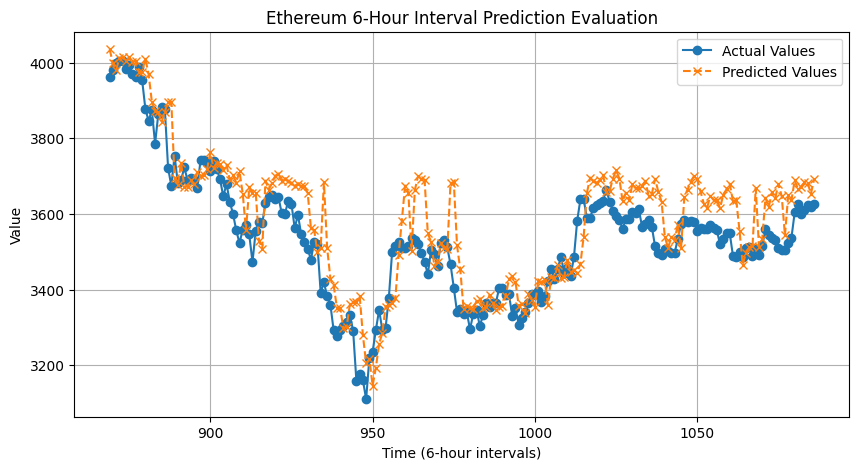

In [ ]:
#ETH eval plot for 6h
eval_plot = pd.DataFrame({
    'Y_true': y_test_6h_eth,
    'Y_pred': y_pred_6h_eth
})
plt.figure(figsize=(10, 5))
plt.plot(eval_plot['Y_true'], label='Actual Values', marker='o')
plt.plot(eval_plot['Y_pred'], label='Predicted Values', linestyle='--', marker='x')
plt.title('Ethereum 6-Hour Interval Prediction Evaluation')
plt.xlabel('Time (6-hour intervals)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

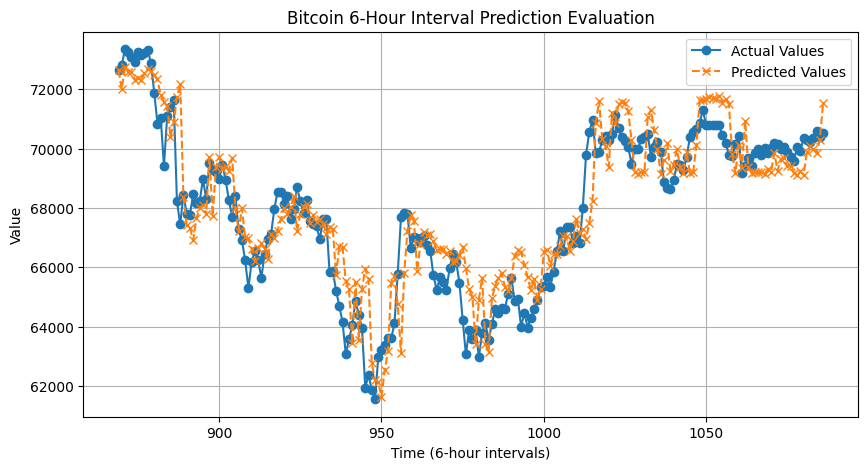

In [ ]:
#ETH eval plot for 6h
eval_plot = pd.DataFrame({
    'Y_true': y_test_6h,
    'Y_pred': y_pred_6h
})
plt.figure(figsize=(10, 5))
plt.plot(eval_plot['Y_true'], label='Actual Values', marker='o')
plt.plot(eval_plot['Y_pred'], label='Predicted Values', linestyle='--', marker='x')
plt.title('Bitcoin 6-Hour Interval Prediction Evaluation')
plt.xlabel('Time (6-hour intervals)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

####Predicting the last new values for april

In [ ]:
M4_ETH=ETH[['Open_time','Close_time','open','high','low','close','positive_p','negative_p']]
M4_ETH=M4_ETH[1087:]
M4_ETH.head()

,Open_time,Close_time,open,high,low,close,positive_p,negative_p
1087,2024-03-31 12:00:00,2024-03-31 14:00:00,3623.45,3638.00,3613.03,3617.68,0.444710,0.070268
1088,2024-03-31 14:00:00,2024-03-31 16:00:00,3617.69,3633.81,3617.32,3626.58,0.169326,0.155694
1089,2024-03-31 16:00:00,2024-03-31 18:00:00,3626.59,3655.32,3613.75,3638.18,0.189404,0.209838
1090,2024-03-31 18:00:00,2024-03-31 20:00:00,3638.19,3644.06,3617.80,3625.32,0.277778,0.133435
1091,2024-03-31 20:00:00,2024-03-31 22:00:00,3625.32,3650.60,3623.20,3645.29,0.221764,0.127002


In [ ]:
ETH_6h_model = joblib.load('rfm_6h_eth.pkl')
predictions_6h_eth = ETH_6h_model.predict(M4_ETH[['open','high','low','close','positive_p','negative_p']])
predictions_6h_eth

array([3683.9397, 3691.4997, 3693.8297, 3672.2423, 3668.91  ])

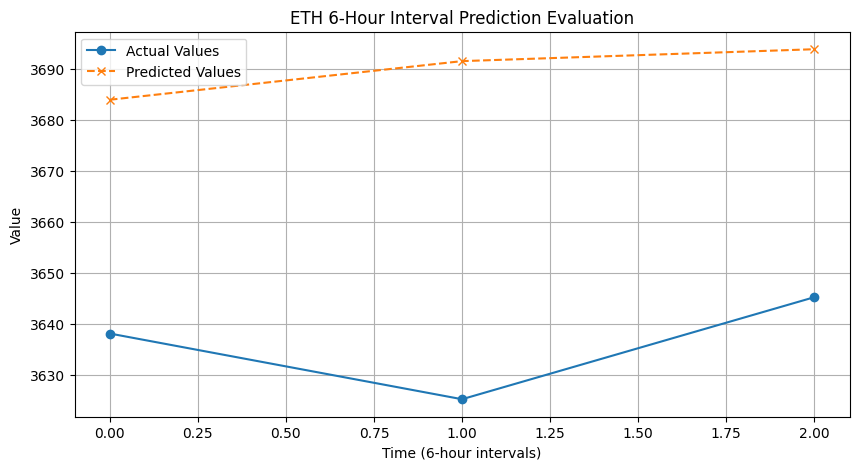

In [ ]:
true_val = list(M4_ETH['close'])[2:]
predicted_values=predictions_6h_eth[:3]
plt.figure(figsize=(10, 5))
plt.plot(true_val, label='Actual Values', marker='o')
plt.plot(predicted_values, label='Predicted Values', linestyle='--', marker='x')
plt.title('ETH 6-Hour Interval Prediction Evaluation')
plt.xlabel('Time (6-hour intervals)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
diff=predicted_values-true_val
diff/true_val*100

array([1.2577635 , 1.82548575, 1.33157307])

In [ ]:
diff_in_pred=(predicted_values[0]-(list(M4_ETH['close'])[0]))/(list(M4_ETH['close'])[0])
real_diff=(true_val[0]-list(M4_ETH['close'])[0])/true_val[0]
print("Profits % from predicted:",diff_in_pred*100)
print("Profits % made from actual case:",real_diff*100)

Profits % from predicted: 1.8315522655402978
Profits % made from actual case: 0.5634685474605435
